<a id='top'></a>
# Schools, Hospitals & House Prices in the DC Metro Area

#### Contributors: VJ Paravastu, Muoyo Okome


In [29]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a id='toc'></a>
### Table of Contents
1. <a href='#problemstatement'>Problem Statement</a>
2. <a href='#datasources'>Data Sources</a>
3. <a href='#datacleaning'>Data Cleaning</a>
4. <a href='#hypothesistests'>Hypothesis Tests</a>
5. <a href='#findings'>Findings</a>
6. <a href='#recommendations'>Recommendations</a>
7. <a href='#nextsteps'>Next Steps</a>

<a id='problemstatement'></a>
### Problem Statement

The goal of this analysis is to better understand house prices in the DC Metro Area, and some of the factors that may affect them, viewed at the county level. 

Specifically we looked at the median house price in each county, the number of hospitals per county, the number of public schools per county, and the number of private schools per county. We also examined how these variables differed in subsets of the poplulation with lower house prices vs higher house prices.

<a href='#top'>Back to Top ↑</a>

<a id='datasources'></a>
### Data Sources

#### <b><a href='https://www.zillow.com/research/data/'>Zillow Home Value Index</a></b>

- Housing

#### <b><a href='https://hifld-geoplatform.opendata.arcgis.com/'>HIFLD Open Data</a></b>

- Public Schools

- Private Schools

- Hospitals

#### <b><a href='https://www2.census.gov'>US Census Bureau</a></b>

- Population Data
<br> 

<a href='#top'>Back to Top ↑</a>

<a id='datacleaning'></a>
### Data Cleaning

In [3]:
# Read in original data

df_housing = pd.read_csv('../data/County_Zhvi_AllHomes.csv', encoding='latin1')
df_public_schools = pd.read_csv('../data/Public_Schools.csv')
df_private_schools = pd.read_csv('../data/Private_Schools.csv')
df_hospitals = pd.read_csv('../data/Hospitals.csv')
df_population = pd.read_csv('../data/PEP_2018_PEPANNRES_with_ann.csv', encoding='latin1')

In [4]:
%run ../python_files/data_cleaning

In [5]:
df_dcmetro_final = clean_data(df_housing, df_public_schools, df_private_schools, df_hospitals, df_population)



<a href='#top'>Back to Top ↑</a>

<a id='hypothes'></a>
### Hypothesis Tests

In [6]:
%run ../python_files/utils

In [7]:
# Calculate & store additional information about DC Metro Counties to be used for tests & visualizations

dcmi = DCMetroInfo(df_dcmetro_final)

In [8]:
%run ../python_files/hypothesis_tests

In [41]:
%run ../python_files/visualizations

<a id='hypothesistests'></a>
### Hypothesis Tests

In [9]:
# Chi Square Test - p value = 0.0330062576612325

chi2_contingency([[ len(dcmi.high_price_low_pct_private_schools), len(dcmi.high_price_high_pct_private_schools) ],
                  [ len(dcmi.low_price_low_pct_private_schools), len(dcmi.low_price_high_pct_private_schools) ]])

(4.545454545454546, 0.0330062576612325, 1, array([[5.5, 5.5],
        [5.5, 5.5]]))

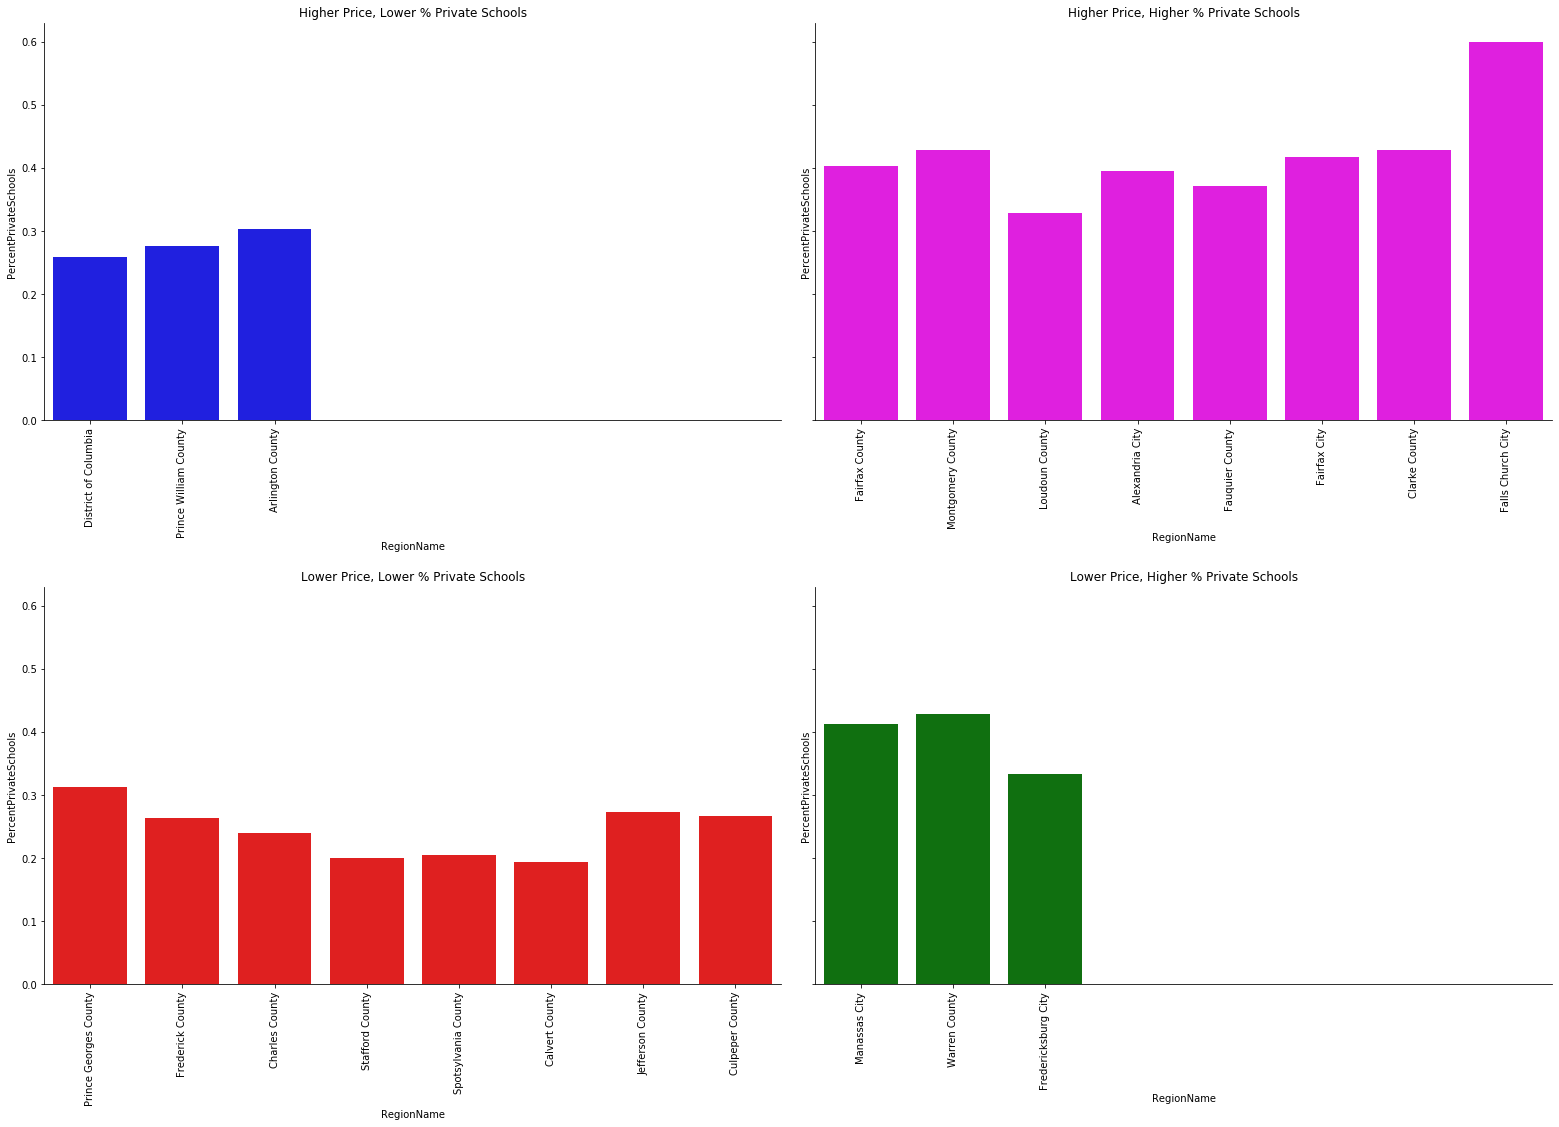

In [10]:
f, ax = plt.subplots(2, 2, figsize=(22,16), sharey=True)

plot_titles = [['Higher Price, Lower % Private Schools','Higher Price, Higher % Private Schools'],
               ['Lower Price, Lower % Private Schools','Lower Price, Higher % Private Schools']]

sns.set_context('talk')
sns.despine(f)
sns.barplot(dcmi.high_price_low_pct_private_schools['RegionName'], dcmi.high_price_low_pct_private_schools['PercentPrivateSchools'], ax=ax[0][0], color='blue')
sns.barplot(dcmi.high_price_high_pct_private_schools['RegionName'], dcmi.high_price_high_pct_private_schools['PercentPrivateSchools'], ax=ax[0][1], color='magenta')
sns.barplot(dcmi.low_price_low_pct_private_schools['RegionName'], dcmi.low_price_low_pct_private_schools['PercentPrivateSchools'], ax=ax[1][0], color='red')
sns.barplot(dcmi.low_price_high_pct_private_schools['RegionName'], dcmi.low_price_high_pct_private_schools['PercentPrivateSchools'], ax=ax[1][1], color='green')

for i in np.arange(0,2):
    for j in np.arange(0,2):
        plt.setp(ax[i][j].xaxis.get_majorticklabels(),rotation=90)
        ax[i][j].title.set_text(plot_titles[i][j])
        ax[i][j].set_xlim(-0.5,8-0.5)
        
        
plt.tight_layout()

In [11]:
# Z tests comparing counties with lower house prices to counties with higher house prices

In [12]:
ztest (dcmi.low_price_counties['PeoplePerHospital'], dcmi.high_price_counties['PeoplePerHospital'])

(0.2676751711328554, 0.7889493631674214)

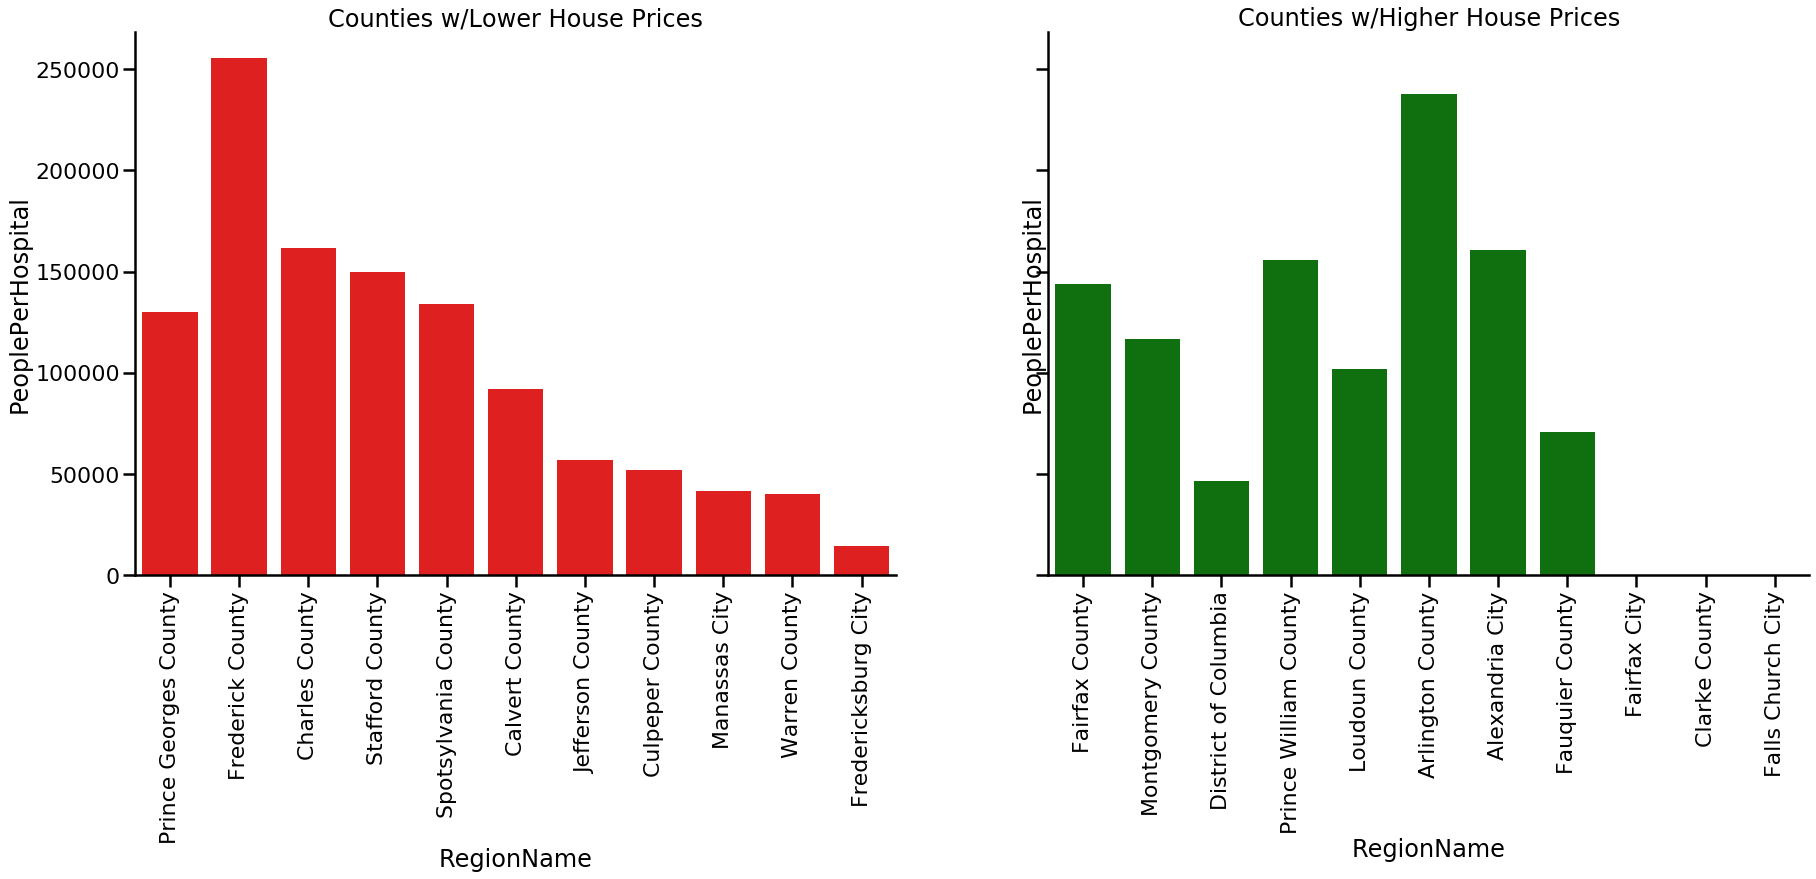

In [33]:
barplots_side_by_side(dcmi, 'RegionName', 'PeoplePerHospital', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

In [14]:
ztest (dcmi.low_price_counties['PeoplePerSchool'], dcmi.high_price_counties['PeoplePerSchool'])

(0.41487340816509116, 0.6782345773522396)

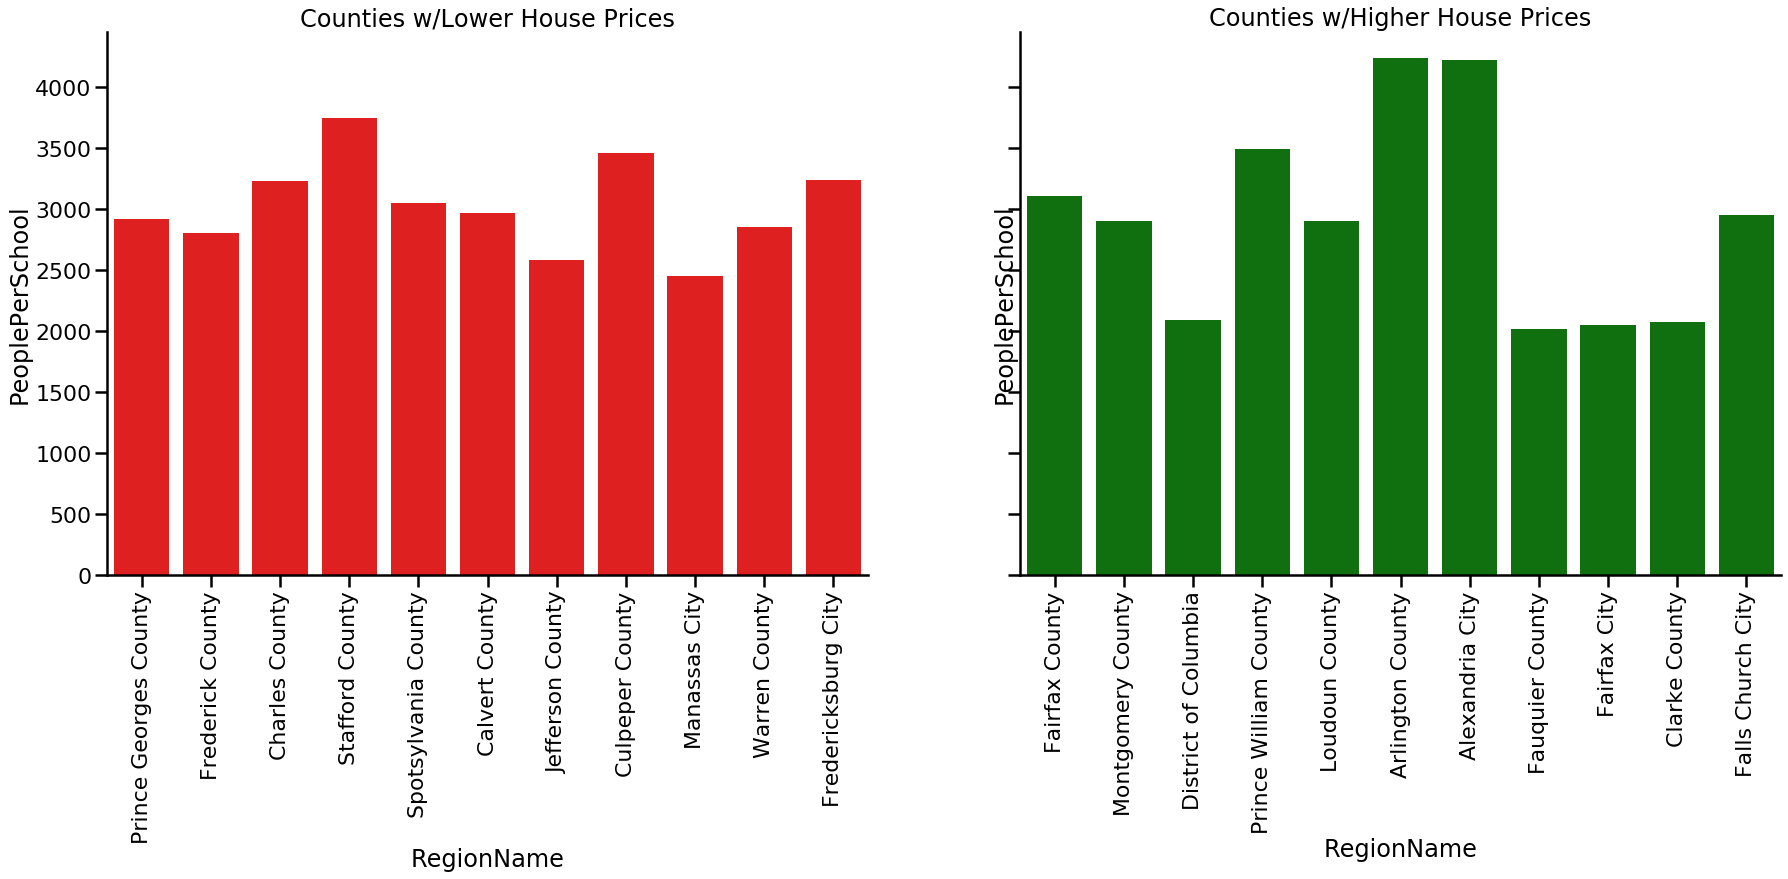

In [35]:
barplots_side_by_side(dcmi, 'RegionName', 'PeoplePerSchool', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

In [16]:
ztest (dcmi.low_price_counties['PercentPrivateSchools'], dcmi.high_price_counties['PercentPrivateSchools'])

(-2.6318370223362892, 0.008492459061615488)

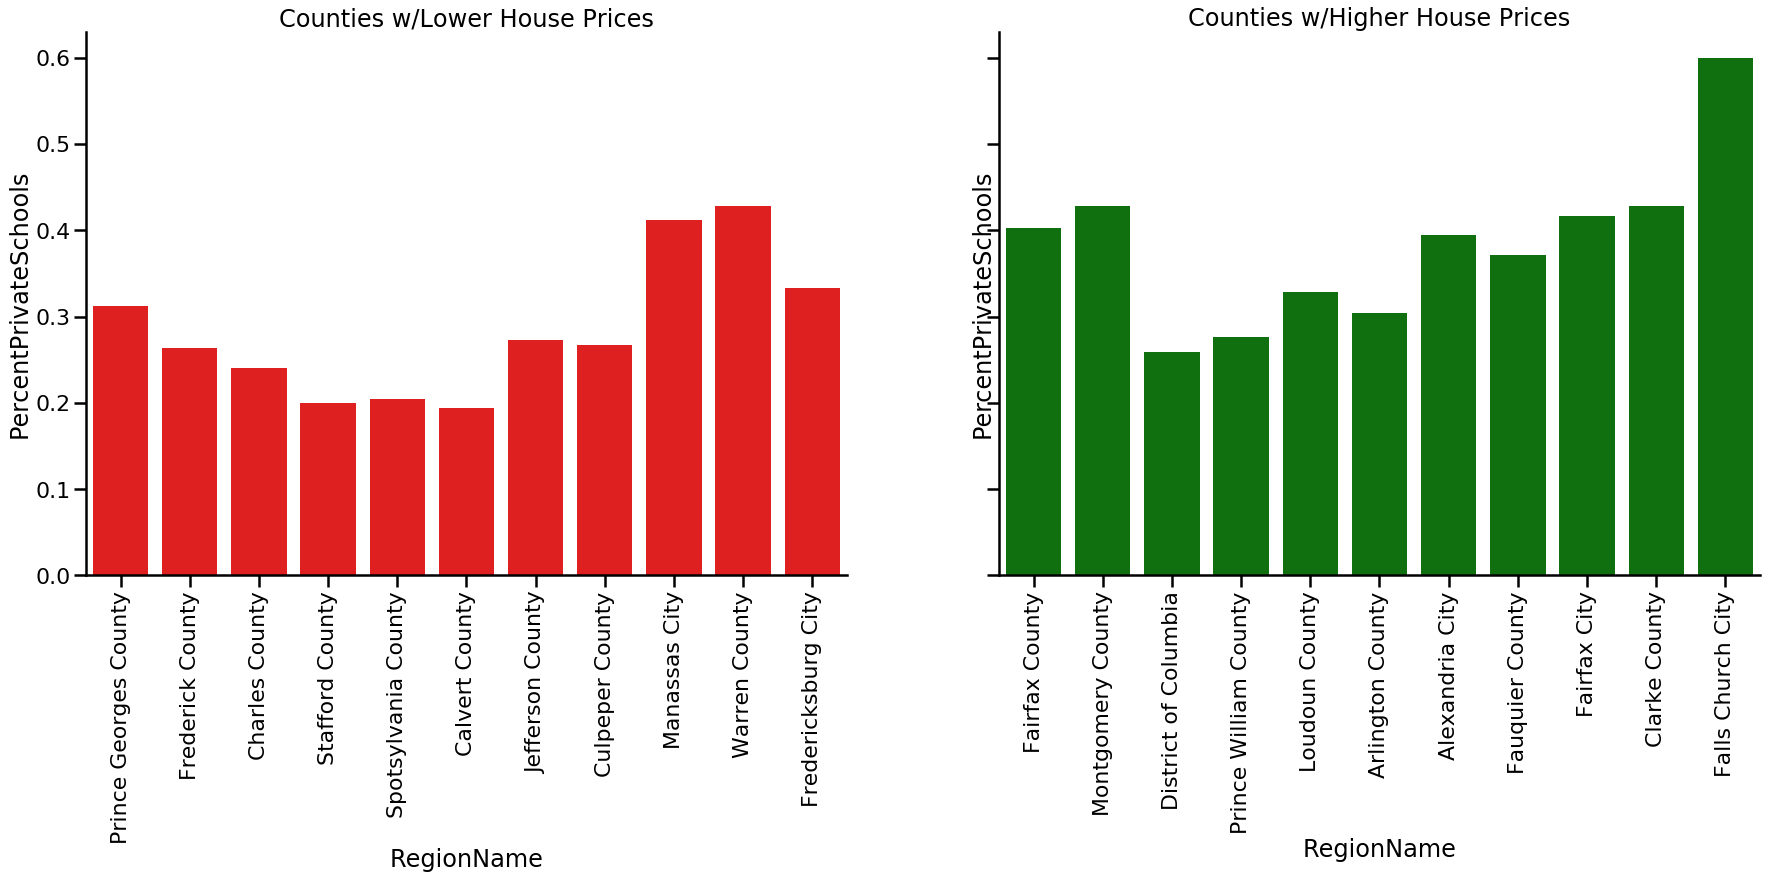

In [38]:
barplots_side_by_side(dcmi, 'RegionName', 'PercentPrivateSchools', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

In [18]:
ztest (dcmi.low_price_counties['NumberOfPrivateSchools'] / dcmi.low_price_counties['Population'], 
       dcmi.high_price_counties['NumberOfPrivateSchools'] / dcmi.high_price_counties['Population'])

(-2.372554466283912, 0.017665558355976503)

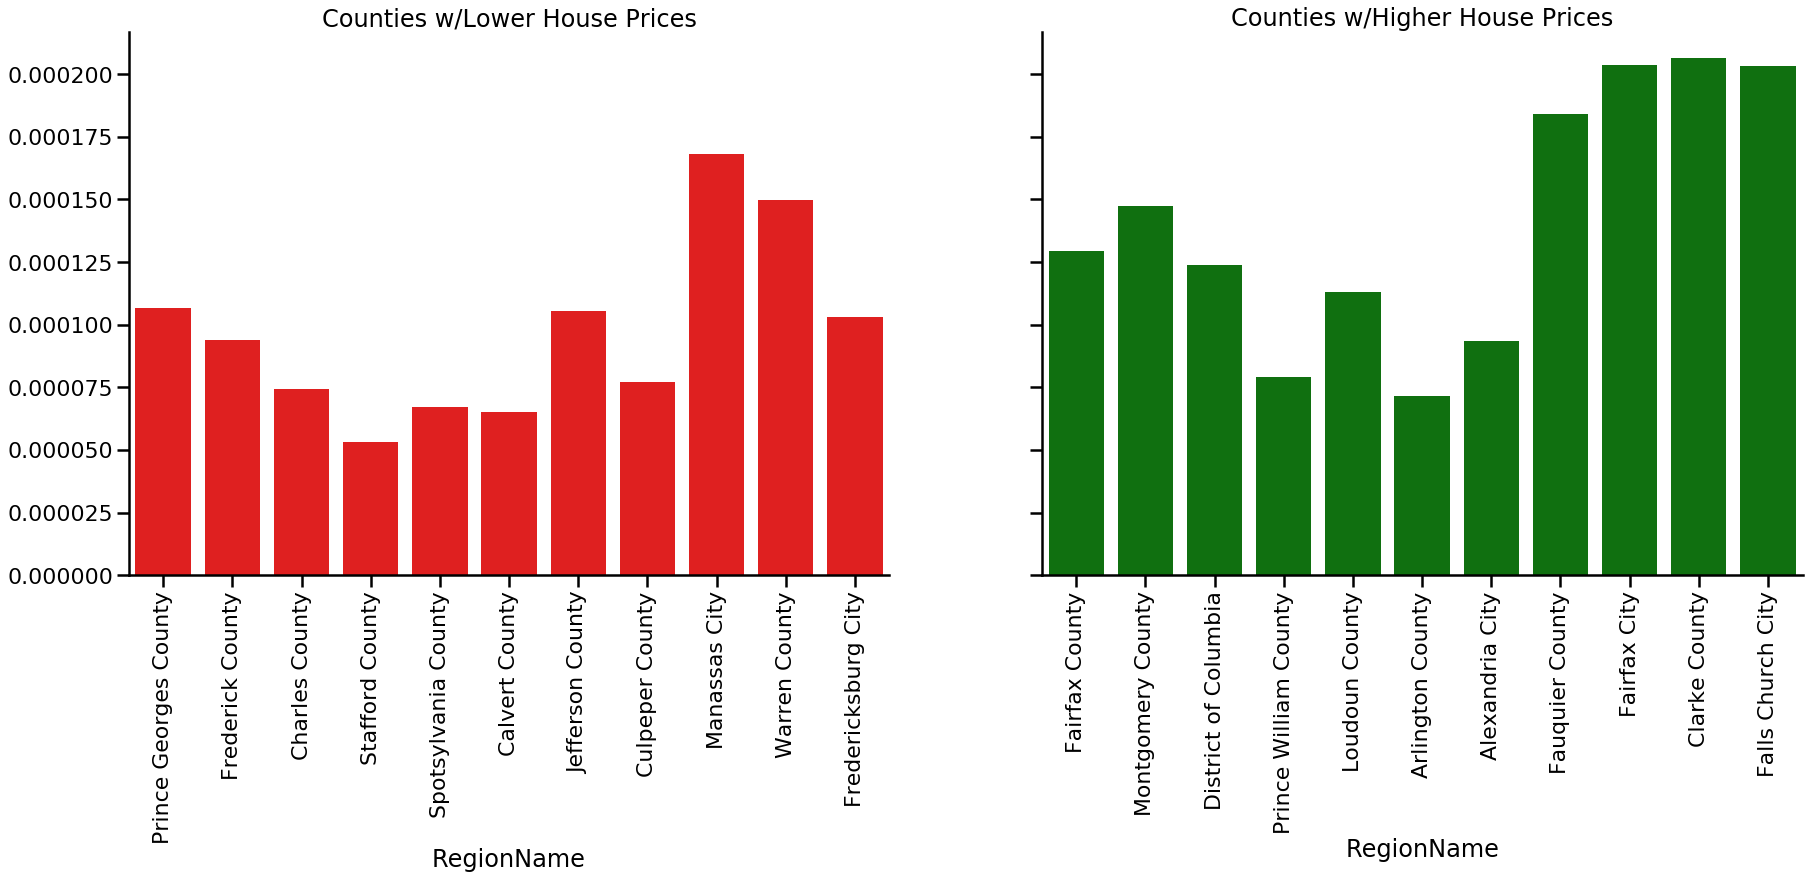

In [44]:
barplots_side_by_side_proportion(dcmi, 'RegionName', 'NumberOfPrivateSchools', 'Population', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

In [20]:
ztest (dcmi.low_price_counties['NumberOfPublicSchools'] / dcmi.low_price_counties['Population'], 
       dcmi.high_price_counties['NumberOfPublicSchools'] / dcmi.high_price_counties['Population'])

(0.4811415006000532, 0.6304159343470777)

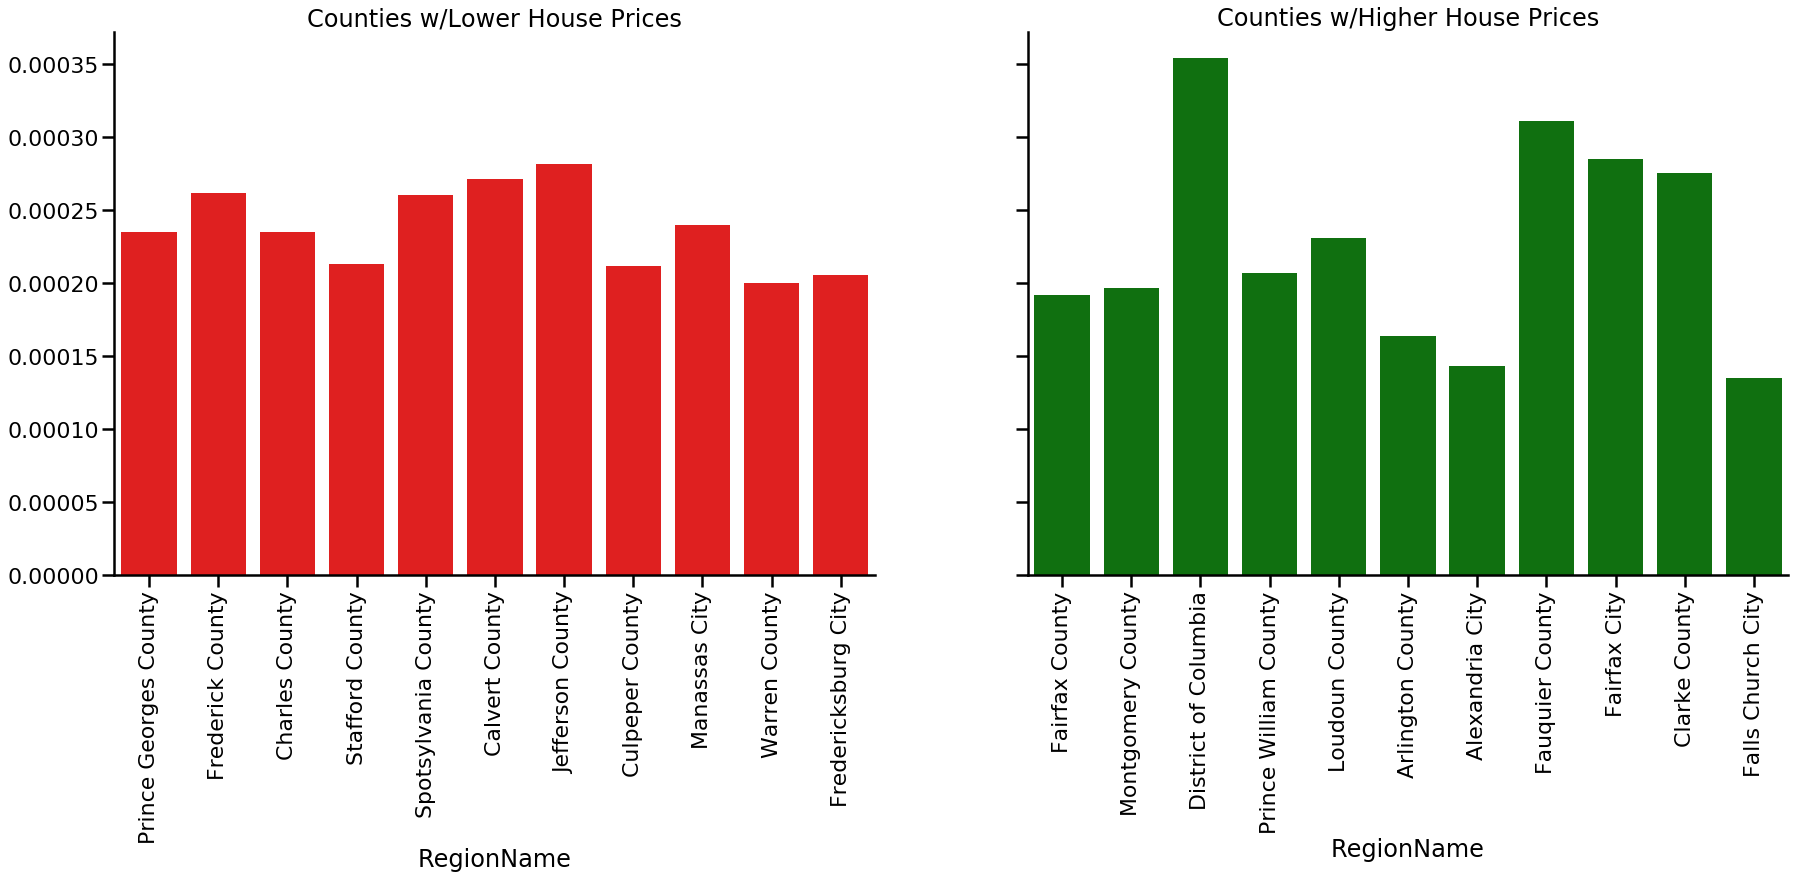

In [46]:
barplots_side_by_side_proportion(dcmi, 'RegionName', 'NumberOfPublicSchools', 'Population', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

<p></p>
<p></p>
<p></p>
   

<a href='#top'>Back to Top ↑</a>

<p></p>
<p></p>
<p></p>

<a id='findings'></a>
### Findings



<a href='#top'>Back to Top ↑</a>

<p></p>
<p></p>
<p></p>

<a id='recommendations'></a>
### Recommendations



<a href='#top'>Back to Top ↑</a>

<a id='nextsteps'></a>
### Next Steps

<p />
<p />

<a href='#top'>Back to Top ↑</a>